# Investigate energies of single point mutations for all METL GFP designs including synthetic baselines

In [1]:
from os.path import join
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_dir = '../data'

In [3]:
exp_seqs = pd.read_csv(join(data_dir, '2024-07-21_metl_design_sequences.csv'), index_col=0)
exp_seqs.rename(columns={'run_name':'sample_name', 'best_mutant':'variant'}, inplace=True)
exp_seqs['sample_name'] = [f'exp_{s}' for s in exp_seqs.sample_name]

for index, row in exp_seqs.iterrows():
    if 'only_train' in row.sample_name:
        _, _, _, nmut = row.sample_name.split('_')
        exp_seqs.loc[index, 'sample_name'] = f'exp_train_{nmut}'
    elif 'rejection' in row.sample_name:
        _, _, nmut = row.sample_name.split('_')
        exp_seqs.loc[index, 'sample_name'] = f'exp_reject_{nmut}'
    elif 'best_train' in row.sample_name:
        exp_seqs.loc[index, 'sample_name'] = 'exp_besttrain_2'
    elif 'wildtype' in row.sample_name:
        exp_seqs.loc[index, 'sample_name'] = 'exp_wt_0'

rev_seqs = pd.read_csv(join(data_dir, '2024-06-11_synthetic_baseline_sequences.csv'))
rev_seqs['sample_name'] = [f'rev_{l[:-5].lower()}_{m}' for l,m in zip(rev_seqs.label, rev_seqs.mutations)]

In [4]:
variants = []
for index, row in pd.concat([exp_seqs[['sample_name', 'variant']], rev_seqs[['sample_name', 'variant']]]).iterrows():
    variants.append({'seq_id':f'{row.sample_name}_design','variant':row.variant})
    try:
        for variant in row.variant.split(','):
            variants.append({'seq_id':f'{row.sample_name}_{variant}', 'variant':variant})
    except:
        continue

variants = pd.DataFrame.from_dict(variants)

In [5]:
#variants.to_csv('2024-09-24_all_GFP_variants.csv')

---
# Look at METL-L 1D and 3D scores

In [6]:
mdf = pd.read_csv(join(data_dir, '2024-09-24_all_GFP_scores.csv'), index_col=0).reset_index(drop=True)
mdf.rename(columns={'metl-l-1D-GFP-64':'metl_1D', 'metl-l-3D-GFP-64':'metl_3D'}, inplace=True)

mdf['design'] = mdf.seq_id.str.contains('design')
mdf['exp'] = mdf.seq_id.str.contains('exp')

## METL-1D predictions for designed and baseline sequences

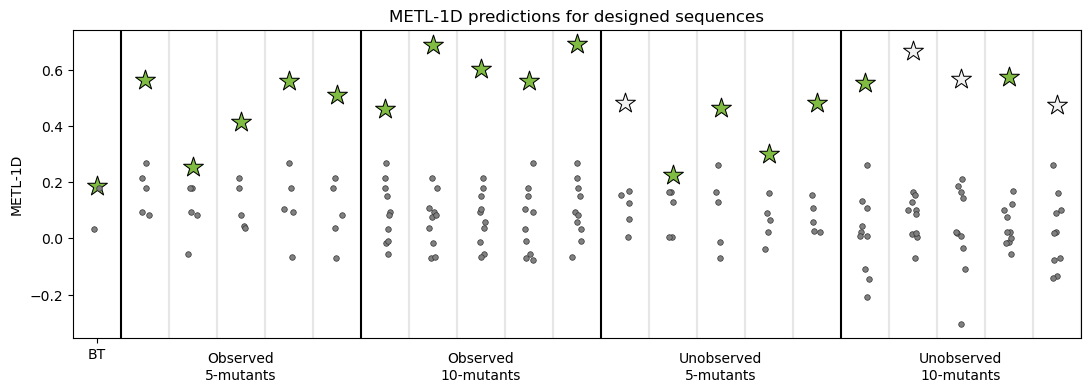

In [14]:
plt.figure(figsize=(13,4))

plot_order =['exp_20'] + [f'exp_{x}' for x in [0,1,2,3,4,10,11,12,13,14,5,6,7,8,9,15,16,17,18,19]]


functional = [f'exp_{x}' for x in [0,1,2,3,4,10,11,12,13,14,6,7,8,9,15,18]] + ['exp_20']

for i, x in enumerate(plot_order):
    if x in functional:
        color='#7fbc41'
    else:
        color='.95'
    sns.stripplot(
        data=mdf[~mdf.design].set_index('seq_id_legacy', drop=False).loc[x],
        x=i,
        y='metl_1D',
        color='.5',
        edgecolor='.2',
        linewidth=.5,
        s=4
    )

    sns.stripplot(
        # data=mdf[mdf.design].set_index('seq_id_legacy', drop=False).loc[x],
        x=i,
        y=[mdf[mdf.design].set_index('seq_id_legacy', drop=False).loc[x,'metl_1D']],
        color=color,
        edgecolor='black',
        linewidth=.75,
        s=15,
        marker='*',
        zorder=0
    )
boundary = [0,5,10,15]
for i in range(0,len(plot_order)):
    if i in boundary:
        plt.axvline(i+.5, color='black')
    else:
        plt.axvline(i+.5, color='.9')

# make division b/w WT and other sample black
# plt.axvline(.5,color='black')

plt.xticks(ticks=[0], labels=['BT'])

groups = ['Observed\n5-mutants','Observed\n10-mutants','Unobserved\n5-mutants', 'Unobserved\n10-mutants']
for l, g in zip([3, 3+5, 3+10, 3+15], groups):
    plt.text(l, -.5, g, ha='center')

plt.title('METL-1D predictions for designed sequences')
plt.ylabel('METL-1D')
plt.show()

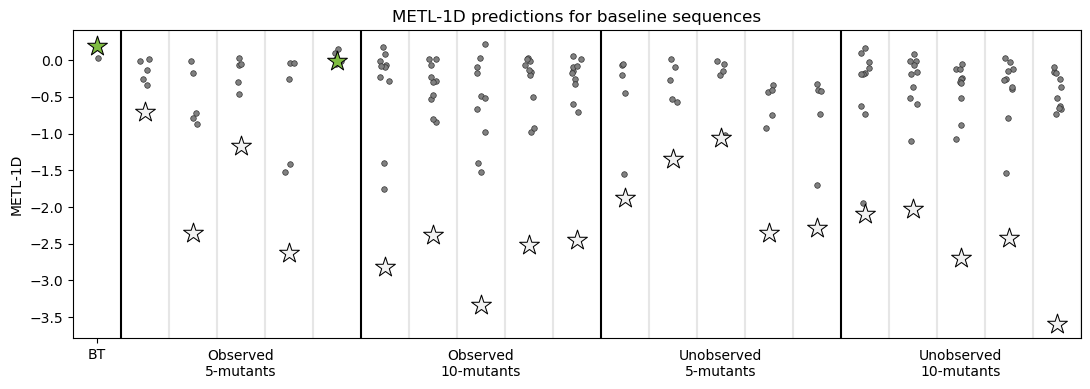

In [8]:
plt.figure(figsize=(13,4))

plot_order =['exp_20'] + [f'rev_{x}' for x in [10,11,12,13,14,15,16,17,18,19,0,1,2,3,4,5,6,7,8,9]]


functional = [f'rev_{x}' for x in [14]] + ['exp_20']

for i, x in enumerate(plot_order):
    if x in functional:
        color='#7fbc41'
    else:
        color='.95'
    sns.stripplot(
        data=mdf[~mdf.design].set_index('seq_id_legacy', drop=False).loc[x],
        x=i,
        y='metl_1D',
        color='.5',
        edgecolor='.2',
        linewidth=.5,
        s=4
    )

    sns.stripplot(
        # data=mdf[mdf.design].set_index('seq_id_legacy', drop=False).loc[x],
        x=i,
        y=[mdf[mdf.design].set_index('seq_id_legacy', drop=False).loc[x,'metl_1D']],
        color=color,
        edgecolor='black',
        linewidth=.75,
        s=15,
        marker='*'
    )
boundary = [0,5,10,15]
for i in range(0,len(plot_order)):
    if i in boundary:
        plt.axvline(i+.5, color='black')
    else:
        plt.axvline(i+.5, color='.9')

# make division b/w WT and other sample black
# plt.axvline(.5,color='black')

plt.xticks(ticks=[0], labels=['BT'])

groups = ['Observed\n5-mutants','Observed\n10-mutants','Unobserved\n5-mutants', 'Unobserved\n10-mutants']
for l, g in zip([3, 3+5, 3+10, 3+15], groups):
    plt.text(l, -4.3, g, ha='center')

plt.title('METL-1D predictions for baseline sequences')
plt.ylabel('METL-1D')
plt.show()

---
# Correlate METL predictions with experimental fluorescence

Fluorescence has been normalized to WT so the values can be compared between experiments

In [9]:
fl_df = pd.concat([
    pd.read_csv(join(data_dir, '2024-10-11_metl-designs_source_data.csv'), index_col=0),
    pd.read_csv(join(data_dir, '2024-10-11_synthetic_baselines_source_data.csv'), index_col=0)
])

In [10]:
fl_df = fl_df.set_index('seq_id_legacy').join(mdf[mdf.design].set_index('seq_id_legacy'))
fl_exp = fl_df[fl_df.exp == True]
fl_syn = fl_df[fl_df.exp == False]

### avGFP/mKate2 vs. METL

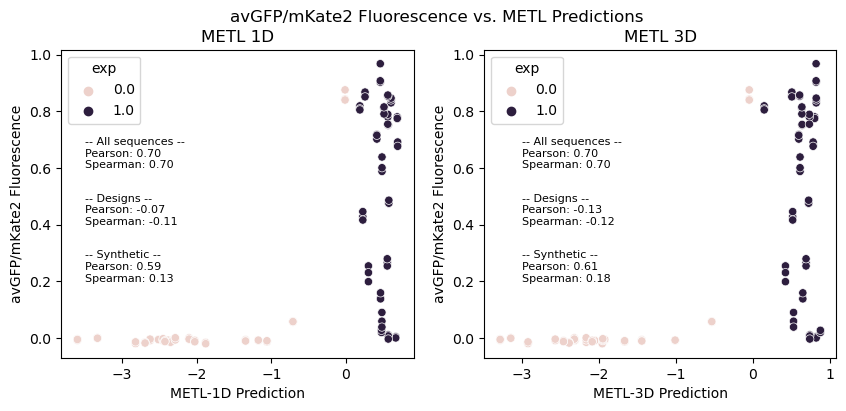

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))


sns.scatterplot(data=fl_df.reset_index(), x='metl_1D',y='avgfp_mkate2_wtnorm', hue='exp', ax=ax1)
ax1.set_title('METL 1D')
ax1.set_xlabel('METL-1D Prediction')
ax1.set_ylabel('avGFP/mKate2 Fluorescence')
sns.scatterplot(data=fl_df.reset_index(), x='metl_3D',y='avgfp_mkate2_wtnorm', hue='exp', ax=ax2)
ax2.set_title('METL 3D')
ax2.set_xlabel('METL-3D Prediction')
ax2.set_ylabel('avGFP/mKate2 Fluorescence')

# METL 1D correlations for all designs
lib_syn_1d_pearson = fl_df[['mkate2_wtnorm', 'avgfp_mkate2_wtnorm','metl_1D', 'metl_3D']].corr('pearson').loc['metl_1D','avgfp_mkate2_wtnorm']
lib_syn_1d_spearman = fl_df[['mkate2_wtnorm', 'avgfp_mkate2_wtnorm','metl_1D', 'metl_3D']].corr('spearman').loc['metl_1D','avgfp_mkate2_wtnorm']

# METL 3D correlations for all designs
lib_syn_3d_pearson = fl_df[['mkate2_wtnorm', 'avgfp_mkate2_wtnorm','metl_1D', 'metl_3D']].corr('pearson').loc['metl_3D','avgfp_mkate2_wtnorm']
lib_syn_3d_spearman = fl_df[['mkate2_wtnorm', 'avgfp_mkate2_wtnorm','metl_1D', 'metl_3D']].corr('spearman').loc['metl_3D','avgfp_mkate2_wtnorm']

# METL 1D correlations for library and synthetic controls
exp_1d_pearson = fl_exp[['mkate2_wtnorm', 'avgfp_mkate2_wtnorm','metl_1D', 'metl_3D']].corr('pearson').loc['metl_1D','avgfp_mkate2_wtnorm']
exp_1d_spearman = fl_exp[['mkate2_wtnorm', 'avgfp_mkate2_wtnorm','metl_1D', 'metl_3D']].corr('spearman').loc['metl_1D','avgfp_mkate2_wtnorm']
syn_1d_pearson = fl_syn[['mkate2_wtnorm', 'avgfp_mkate2_wtnorm','metl_1D', 'metl_3D']].corr('pearson').loc['metl_1D','avgfp_mkate2_wtnorm']
syn_1d_spearman = fl_syn[['mkate2_wtnorm', 'avgfp_mkate2_wtnorm','metl_1D', 'metl_3D']].corr('spearman').loc['metl_1D','avgfp_mkate2_wtnorm']

# METL 3D correlations for library and synthetic controls
exp_3d_pearson = fl_exp[['mkate2_wtnorm', 'avgfp_mkate2_wtnorm','metl_1D', 'metl_3D']].corr('pearson').loc['metl_3D','avgfp_mkate2_wtnorm']
exp_3d_spearman = fl_exp[['mkate2_wtnorm', 'avgfp_mkate2_wtnorm','metl_1D', 'metl_3D']].corr('spearman').loc['metl_3D','avgfp_mkate2_wtnorm']
syn_3d_pearson = fl_syn[['mkate2_wtnorm', 'avgfp_mkate2_wtnorm','metl_1D', 'metl_3D']].corr('pearson').loc['metl_3D','avgfp_mkate2_wtnorm']
syn_3d_spearman = fl_syn[['mkate2_wtnorm', 'avgfp_mkate2_wtnorm','metl_1D', 'metl_3D']].corr('spearman').loc['metl_3D','avgfp_mkate2_wtnorm']

ax1.text(-3.5,.6,f'-- All sequences --\nPearson: {lib_syn_1d_pearson:.2f}\nSpearman: {lib_syn_1d_spearman:.2f}', fontsize=8)
ax1.text( -3.5,.4,f'-- Designs --\nPearson: {exp_1d_pearson:.2f}\nSpearman: {exp_1d_spearman:.2f}', fontsize=8)
ax1.text( -3.5,.2,f'-- Synthetic --\nPearson: {syn_1d_pearson:.2f}\nSpearman: {syn_1d_spearman:.2f}', fontsize=8)


ax2.text(-3,.6,f'-- All sequences --\nPearson: {lib_syn_3d_pearson:.2f}\nSpearman: {lib_syn_3d_spearman:.2f}', fontsize=8)
ax2.text( -3,.4,f'-- Designs --\nPearson: {exp_3d_pearson:.2f}\nSpearman: {exp_3d_spearman:.2f}', fontsize=8)
ax2.text( -3,.2,f'-- Synthetic --\nPearson: {syn_3d_pearson:.2f}\nSpearman: {syn_3d_spearman:.2f}', fontsize=8)

fig.suptitle('avGFP/mKate2 Fluorescence vs. METL Predictions')

plt.show()




### mKate2 vs. METL

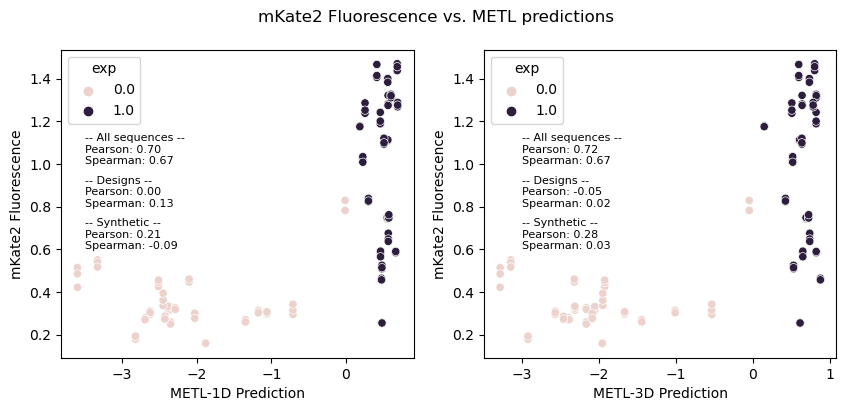

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

sns.scatterplot(data=fl_df.reset_index(), x='metl_1D',y='mkate2_wtnorm', hue='exp', ax=ax1)
# ax1.set_title('METL 1D')
ax1.set_xlabel('METL-1D Prediction')
ax1.set_ylabel('mKate2 Fluorescence')
sns.scatterplot(data=fl_df.reset_index(), x='metl_3D',y='mkate2_wtnorm', hue='exp', ax=ax2)
# ax2.set_title('METL 3D')
ax2.set_xlabel('METL-3D Prediction')
ax2.set_ylabel('mKate2 Fluorescence')
fig.suptitle('mKate2 Fluorescence vs. METL predictions')


# METL 1D correlations for all designs
lib_syn_1d_pearson = fl_df[['mkate2_wtnorm', 'avgfp_mkate2_wtnorm','metl_1D', 'metl_3D']].corr('pearson').loc['metl_1D','mkate2_wtnorm']
lib_syn_1d_spearman = fl_df[['mkate2_wtnorm', 'avgfp_mkate2_wtnorm','metl_1D', 'metl_3D']].corr('spearman').loc['metl_1D','mkate2_wtnorm']

# METL 3D correlations for all designs
lib_syn_3d_pearson = fl_df[['mkate2_wtnorm', 'avgfp_mkate2_wtnorm','metl_1D', 'metl_3D']].corr('pearson').loc['metl_3D','mkate2_wtnorm']
lib_syn_3d_spearman = fl_df[['mkate2_wtnorm', 'avgfp_mkate2_wtnorm','metl_1D', 'metl_3D']].corr('spearman').loc['metl_3D','mkate2_wtnorm']

# METL 1D correlations for library and synthetic controls
exp_1d_pearson = fl_exp[['mkate2_wtnorm', 'avgfp_mkate2_wtnorm','metl_1D', 'metl_3D']].corr('pearson').loc['metl_1D','mkate2_wtnorm']
exp_1d_spearman = fl_exp[['mkate2_wtnorm', 'avgfp_mkate2_wtnorm','metl_1D', 'metl_3D']].corr('spearman').loc['metl_1D','mkate2_wtnorm']
syn_1d_pearson = fl_syn[['mkate2_wtnorm', 'avgfp_mkate2_wtnorm','metl_1D', 'metl_3D']].corr('pearson').loc['metl_1D','mkate2_wtnorm']
syn_1d_spearman = fl_syn[['mkate2_wtnorm', 'avgfp_mkate2_wtnorm','metl_1D', 'metl_3D']].corr('spearman').loc['metl_1D','mkate2_wtnorm']

# METL 3D correlations for library and synthetic controls
exp_3d_pearson = fl_exp[['mkate2_wtnorm', 'avgfp_mkate2_wtnorm','metl_1D', 'metl_3D']].corr('pearson').loc['metl_3D','mkate2_wtnorm']
exp_3d_spearman = fl_exp[['mkate2_wtnorm', 'avgfp_mkate2_wtnorm','metl_1D', 'metl_3D']].corr('spearman').loc['metl_3D','mkate2_wtnorm']
syn_3d_pearson = fl_syn[['mkate2_wtnorm', 'avgfp_mkate2_wtnorm','metl_1D', 'metl_3D']].corr('pearson').loc['metl_3D','mkate2_wtnorm']
syn_3d_spearman = fl_syn[['mkate2_wtnorm', 'avgfp_mkate2_wtnorm','metl_1D', 'metl_3D']].corr('spearman').loc['metl_3D','mkate2_wtnorm']

ax1.text(-3.5,1,f'-- All sequences --\nPearson: {lib_syn_1d_pearson:.2f}\nSpearman: {lib_syn_1d_spearman:.2f}', fontsize=8)
ax1.text( -3.5,.8,f'-- Designs --\nPearson: {exp_1d_pearson:.2f}\nSpearman: {exp_1d_spearman:.2f}', fontsize=8)
ax1.text( -3.5,.6,f'-- Synthetic --\nPearson: {syn_1d_pearson:.2f}\nSpearman: {syn_1d_spearman:.2f}', fontsize=8)


ax2.text(-3,1,f'-- All sequences --\nPearson: {lib_syn_3d_pearson:.2f}\nSpearman: {lib_syn_3d_spearman:.2f}', fontsize=8)
ax2.text( -3,.8,f'-- Designs --\nPearson: {exp_3d_pearson:.2f}\nSpearman: {exp_3d_spearman:.2f}', fontsize=8)
ax2.text( -3,.6,f'-- Synthetic --\nPearson: {syn_3d_pearson:.2f}\nSpearman: {syn_3d_spearman:.2f}', fontsize=8)



plt.show()


In [13]:
print(f"Spearmans METL-1D vs. mKate2: {fl_df[['mkate2_wtnorm', 'avgfp_mkate2_wtnorm','metl_1D', 'metl_3D']].corr('spearman').loc['metl_1D','mkate2_wtnorm']:.2f}")
print(f"Spearmans METL-3D vs. avGFP/mKate2: {fl_df[['mkate2_wtnorm', 'avgfp_mkate2_wtnorm','metl_1D', 'metl_3D']].corr('spearman').loc['metl_1D','avgfp_mkate2_wtnorm']:.2f}")

print(f"Pearsons METL-1D vs. mKate2: {fl_df[['mkate2_wtnorm', 'avgfp_mkate2_wtnorm','metl_1D', 'metl_3D']].corr('pearson').loc['metl_3D','mkate2_wtnorm']:.2f}")
print(f"Pearsons METL-3D vs. avGFP/mKate2: {fl_df[['mkate2_wtnorm', 'avgfp_mkate2_wtnorm','metl_1D', 'metl_3D']].corr('pearson').loc['metl_3D','avgfp_mkate2_wtnorm']:.2f}")


Spearmans METL-1D vs. mKate2: 0.67
Spearmans METL-3D vs. avGFP/mKate2: 0.70
Pearsons METL-1D vs. mKate2: 0.72
Pearsons METL-3D vs. avGFP/mKate2: 0.70
